# Proyecto Open Data I

### ANÁLISIS DE DATOS BICIMAD Y ACCIDENTES DE TRÁFICO CON IMPLICACIÓN DE BICICLETAS EN MADRID

### Introducción

El objetivo principal de nuestro proyecto Open Data era emplear datos abiertos para la realización de un análisis de datos a través de Python.

Este proyecto tiene como pilares dos elementos:

* Open data
* Análisis exploratorio de datos

Hemos trabajado de la mano del open data ya que es lo que nos proporcionaba la fuente de datos que empleamos para este proyecto.

Indgamos en un análisis de los datos que obtenemos, aparte de la limpieza y el cuidado de estos datos, ya que es la información detrás de estos datos lo que de verdad esconde el valor latente de estos últimos. En el actual contexto del Big Data, el análisis de los datos ha tomado un papel inédito, especialmente relevante a la hora de realizar la toma de decisones. Se puede emplear en diversos campos y es muy flexible, permitiendo sacarle una miriada de utilidades.

En nuestro proyecto manejamos datos de BiciMad, el servicio de alquiler de bicicletas públicas de la Comunidad de Madrid, y de accidentes de tráfico con implicación de bicicletas en Madrid. Con estos datos que hemos obtenido hemos podido investigar desde la movilidad ciclista de la ciudad hasta poder sacar conclusiones sobre posibles correlaciones entre ambos conjuntos de datos. Empleando técnicas de limpieza de datos, de modelado, y de graficación hemos montado un proyecto que nos ha permitido sumergirnos en el análisis que perseguíamos como fin. 

### Datos: BiciMAD

El servicio BiciMAD trata del alquiler de bicicletas públicas en Madrid. Es un servicio dirigido a todos los ciudadanos y visitantes de la ciudad de Madrid, presentado como alternativa de transporte sostenible limpio y saludable. Este es el principal objetivo de BiciMAD junto con fomentar el uso de la bicicleta en la ciudad.

El servicio de bicicleta pública está sujeto a unas tarifas aprobadas por el Ayuntamiento de Madrid, las cuales incluyen un seguro que cubre cualquier percance sufrido durante su utilización. 

El horario de funcionamiento es de forma ininterrumpida durante las 24 horas del día los 365 días del año.

El portal de datos abiertos de la Comunidad de Madrid ofrece un amplio dataset dedicado a BiciMAD. Nosotras hemos trabajado con los siguientes datasets procedentes de este portal:

1. **Alta de usuarios y usos por día del servicio público de bicicleta eléctrica.**

En este conjunto de datos se encuentra la información día a día de: 

* **Usuarios:** nuevas altas diarias en el sistema en sus dos modalidades (abonos anuales y ocasionales)

* **Usos:** número total diario de usos de la bicicleta. Esta información se presenta en csv (datos del último mes y datos acumulados desde el inicio de la prestación del servicio) y también en Excel.

Hemos tenido acceso a datos desde su puesta en funcionamiento en junio de 2014.


2. **Bases del servicio público de bicicleta eléctrica de la ciudad de Madrid.**

Cada estación se compone del tótem (CIC) que es el centro de interacción con el ciclista y de los anclajes para la colocación de las bicicletas.

#### Acondicionamiento del entorno de trabajo

Una vez que tenemos seleccionados los datos con los que queriamos trabajar, preparamos el entorno de trabajo con el que ibamos a desarrollar el proyecto.
Ya que ibamos a trabajar de la mano de python, hemos empleado la herramienta Anaconda para conectarnos a JupyterLab.

Lo primero, una vez preparado el entorno de trabajo, consistió en importar los datos; para ello utilizamos la librería pandas, con la que decidimos trabajar para el proyecto en su totalidad.

In [1]:
# Antes de nada, importamos warnings para evitar los warnings en algunos métodos
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(sc)

<SparkContext master=local[*] appName=PySparkShell>


In [3]:
import pandas as pd

#### Limpieza de Datos

A continuación modelamos distintos dataframes para cada dataset:

* **dfUsuarios:** nos va a mostrar los datos de los usuarios de BiciMad.

In [4]:
pwd

u'/Users/patrimballesteros/Documents/2\xba ING MATEMA\u0301TICA /S1/Proyecto Open Data I'

In [5]:
# Creamos un dataframe que muestre el dataset de USUARIOS
dfUsuarios = pd.read_excel('bicis_usuarios_abonos.xls')
dfUsuarios.head()

,Dia,Altas nuevos usuarios activos ab. anual sin ttp dia,Altas nuevos usuarios activos ab. anual con ttp dia,Altas nuevos usuarios activos ab. anual total dia,Unnamed: 4,Usuarios activos ab. anual sin ttp acumulado desde inicio,Usuarios activos ab. anual con ttp acumulado desde inicio,Usuarios activos ab. anual total acumulado desde inicio
0,2014-06-23,47.0,44.0,91.0,NaN,47.0,44.0,91.0
1,2014-06-24,21.0,19.0,40.0,NaN,68.0,63.0,131.0
2,2014-06-25,193.0,180.0,373.0,NaN,261.0,243.0,504.0
3,2014-06-26,150.0,113.0,263.0,NaN,411.0,356.0,767.0
4,2014-06-27,185.0,155.0,340.0,NaN,596.0,511.0,1107.0


In [6]:
list(dfUsuarios.columns.values)

[u'Dia',
 u'Altas nuevos usuarios activos ab. anual sin ttp dia',
 u'Altas nuevos usuarios activos ab. anual con ttp dia',
 u'Altas nuevos usuarios activos ab. anual total dia',
 'Unnamed: 4',
 u'Usuarios activos ab. anual sin ttp acumulado desde inicio',
 u'Usuarios activos ab. anual con ttp acumulado desde inicio',
 u'Usuarios activos ab. anual total acumulado desde inicio']

A continuación proseguimos a la limpieza de datos, que consistió en lo siguiente:

*	Borramos columna ‘Unnamed: 4’ ya que estaba vacía y no aportaba ninguna información útil.

*	Ya que importamos los datos en formato Excel, nos encontramos muchas filas vacias bajo denominación ‘NaN’ que a su vez nos aportaban ningún dato relevante. Por lo tanto también los borramos.


In [50]:
# Eliminamos la columna 'Unnamed: 4' ya que no hay datos
del dfUsuarios['Unnamed: 4']
dfUsuarios.head()

,Día,Altas nuevos usuarios activos ab. anual sin ttp día,Altas nuevos usuarios activos ab. anual con ttp día,Altas nuevos usuarios activos ab. anual total día,Usuarios activos ab. anual sin ttp acumulado desde inicio,Usuarios activos ab. anual con ttp acumulado desde inicio,Usuarios activos ab. anual total acumulado desde inicio
0,2014-06-23,47.0,44.0,91.0,47.0,44.0,91.0
1,2014-06-24,21.0,19.0,40.0,68.0,63.0,131.0
2,2014-06-25,193.0,180.0,373.0,261.0,243.0,504.0
3,2014-06-26,150.0,113.0,263.0,411.0,356.0,767.0
4,2014-06-27,185.0,155.0,340.0,596.0,511.0,1107.0


Aquí podemos ver que las últimas filas consisten todas de valores NaT y NaN.
Por lo tanto, después de haber comprobado que todas las casillas tenían valores nulos, procedimos a emplear el método dropna() para suprimir todos los estos valores nulos. 

In [51]:
# Borramos valores NaN y NaT
dfUsuarios.dropna().head()

,Día,Altas nuevos usuarios activos ab. anual sin ttp día,Altas nuevos usuarios activos ab. anual con ttp día,Altas nuevos usuarios activos ab. anual total día,Usuarios activos ab. anual sin ttp acumulado desde inicio,Usuarios activos ab. anual con ttp acumulado desde inicio,Usuarios activos ab. anual total acumulado desde inicio
0,2014-06-23,47.0,44.0,91.0,47.0,44.0,91.0
1,2014-06-24,21.0,19.0,40.0,68.0,63.0,131.0
2,2014-06-25,193.0,180.0,373.0,261.0,243.0,504.0
3,2014-06-26,150.0,113.0,263.0,411.0,356.0,767.0
4,2014-06-27,185.0,155.0,340.0,596.0,511.0,1107.0


In [10]:
spDF = sqlContext.createDataFrame(dfUsuarios)

In [11]:
rdd1=spDF.rdd.repartition(1)

In [12]:
rdd1.saveAsTextFile('/Users/patrimballesteros/Desktop/rddUsuarios.txt') 

* **dfUsos:** Para el conjunto de datos sobre el uso de las bicicletas creamos un dataframe llamado dfUsos.

La limpieza en este caso simplemente trató en borrar dos columnas: ‘Unnamed: 4’ y ‘Unnamed: 8’; tras haber hecho la misma comprobación que en la anterior de que no hubiese ningun dato util en esas columnas.

In [15]:
# Creamos un dataframe que muestre el dataset de USOS
dfUsos = pd.read_excel('bicis_usos_acumulado (2).xls')
dfUsos.head()

,DIA,Usos bicis abono anual,Usos bicis abono ocasional,Usos bicis total,Unnamed: 4,Usos abono anual acumulado,Usos abono ocasional acumulado,Usos total acumulado desde inicio,Unnamed: 8,Acumulado mes total
0,2014-06-23,17,79,96,NaN,17,79,96,NaN,NaN
1,2014-06-24,24,47,71,NaN,41,126,167,NaN,NaN
2,2014-06-25,105,14,119,NaN,146,140,286,NaN,NaN
3,2014-06-26,120,15,135,NaN,266,155,421,NaN,NaN
4,2014-06-27,131,18,149,NaN,397,173,570,NaN,NaN


In [16]:
# Eliminamos los datos nulos (tenemos dos columnas a eliminar en este dataframe)
del dfUsos['Unnamed: 4']
del dfUsos['Unnamed: 8']
dfUsos.head()

,DIA,Usos bicis abono anual,Usos bicis abono ocasional,Usos bicis total,Usos abono anual acumulado,Usos abono ocasional acumulado,Usos total acumulado desde inicio,Acumulado mes total
0,2014-06-23,17,79,96,17,79,96,NaN
1,2014-06-24,24,47,71,41,126,167,NaN
2,2014-06-25,105,14,119,146,140,286,NaN
3,2014-06-26,120,15,135,266,155,421,NaN
4,2014-06-27,131,18,149,397,173,570,NaN


In [17]:
spDF = sqlContext.createDataFrame(dfUsos)

In [18]:
rdd1=spDF.rdd.repartition(1)

In [20]:
rdd1.saveAsTextFile('/Users/patrimballesteros/Desktop/rddUsos.txt') 

En la última columna aparecen varios valores NaN pero esto se debe a que trata del acumulado el mes, por lo tanto solo aparecen valores en el último dia de cada mes. Por eso la hemos dejado tal y como está.

* **dfBases**: Por último para el conjunto de datos de las bases de las bicicletas elaboramos un dataframe denominado dfBases.

In [9]:
# Creamos un dataframe que muestre el dataset de BASES
dfBases = pd.read_excel('bases_bicimad.xls')
dfBases.head()

,Número,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,LONGITUD,LATITUD,DIRECCION
0,001a,440394.55,4474280.53,41813,01 CENTRO,01-06 SOL,"PUERTA DEL SOL, PLAZA, DE LA",1 B,BiciMAD,24,-3.702575,40.417016,"PUERTA DEL SOL, PLAZA, DE LA,1 B"
1,001b,440404.21,4474287.39,41813,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",1,BiciMAD,24,-3.702462,40.417078,"ALCALA, CALLE, DE,1"
2,2,440134.83,4474678.23,41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,27,-3.705674,40.420580,"MIGUEL MOYA, CALLE, DE,1"
3,3,440012.98,4475760.68,41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430322,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL,2"
4,4,440396.40,4475565.36,41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,27,-3.702674,40.428591,"MANUELA MALASAÑA, CALLE, DE,3"


No hemos necesitado emplear la limpieza de datos en este dataset ya que no consta la presencia de valores nulos, y opinamos que el conjunto de datos al completo puede ser de utilidad.

#### Análisis de Datos Unilateral

En el siguiente apartado ofrece un análisis de los datos que hemos considerado de mayor interés de BiciMad.

**1. ‘Altas nuevos usuarios activos abono anual sin ttp día’ y ‘Altas nuevos usuarios activos abono anual con ttp día’**

(ttp = tarjeta transporte publico)

In [10]:
# Antes de nada, para poder proceder a la visualización de los datos obtenidos, debemos importar varias librerias
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Para el primer gráfico hemos escogido el formato de diagrama de dispersión. Esto se debe a que nuestro propósito era ver el vínculo, si existente, entre el uso del abono anual sin ttp y el abono anual con ttp.

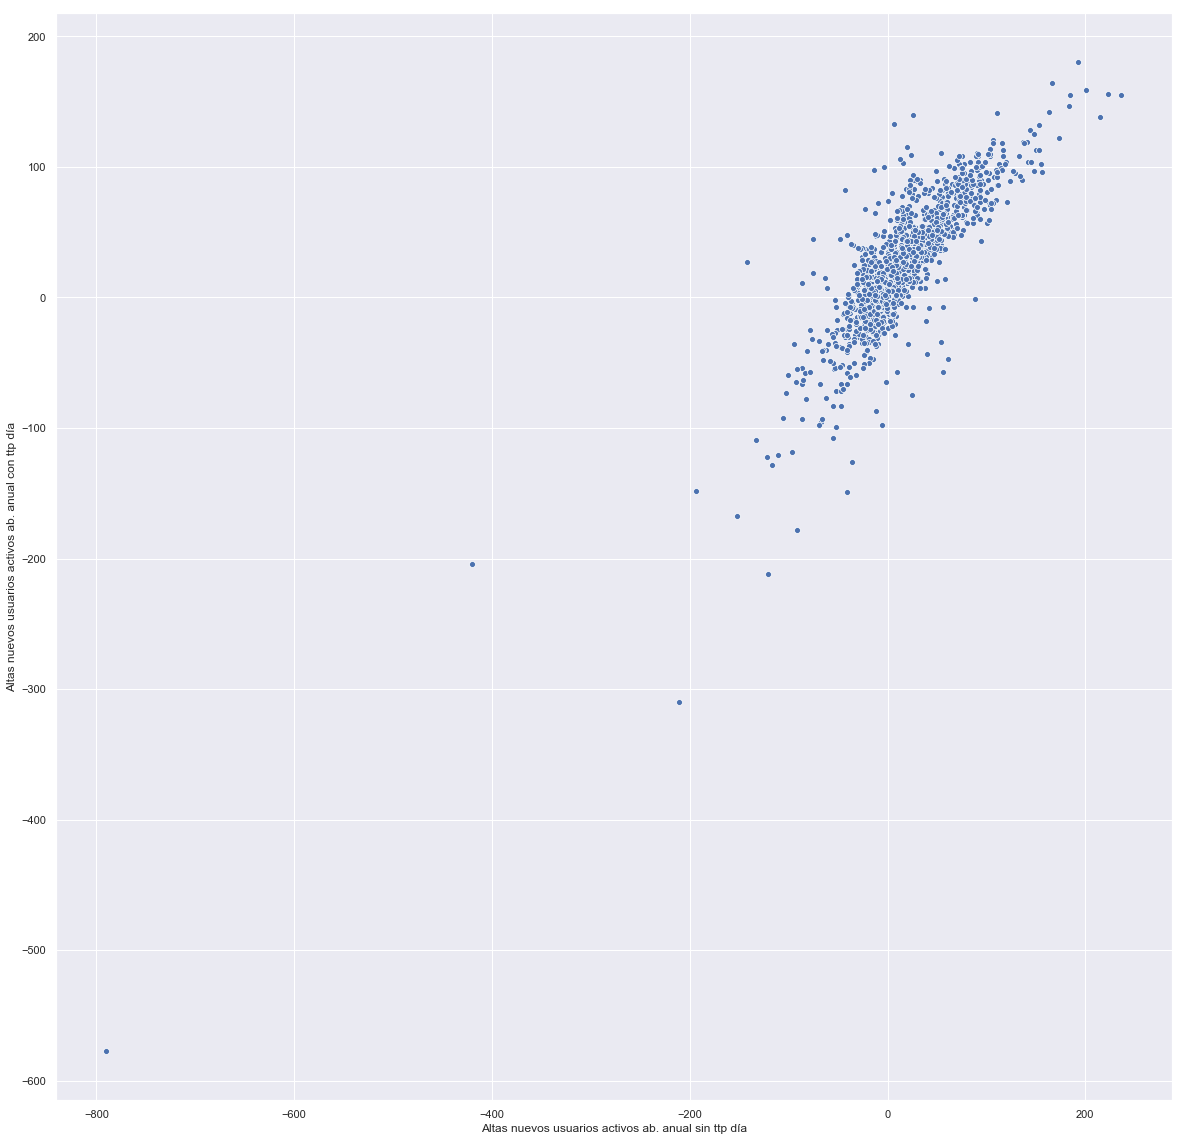

In [11]:
sns.set()
f= plt.subplots(figsize =(20,20))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Altas nuevos usuarios activos ab. anual sin ttp día", y="Altas nuevos usuarios activos ab. anual con ttp día",
                     palette=cmap, sizes=(10, 200),
                     data=dfUsuarios)

La conclusión principal que sacamos de este gráfico es que es independiente el hecho de que los usuarios tengan o no ttp (tarjeta de transporte público). Nos apoyamos en el hecho de que la mayoría de los datos están concentrados entre -200 y 200 en ambos el eje x como el y. Esto quiere decir que no se manifiesta gran variación entre ambos grupos, a excepción de algunos outliers; sin embargo estos últimos los consideramos muy pocos para ser significativos.

Sin duda nos ha resultado curioso que ambos se comporten de manera casi idéntica.

**2. 'DIA' y 'Usos bicis total'**

Los siguientes gráficos representan la evolución del uso de la bici cada mes del año. Hemos tomado 2017 como ejemplo ya que las bicis ya se encuentran más asentadas que los primeros años. Los tres graficos nos guían hacia la misma conclusión solo que hemos decidido explorar visualizaciones variadas.

In [12]:
# Comenzamos creando un dataframe que contenga los datos del día 30 de cada mes del año 2017 (Excepcionando febrero del que se muestran los datos del día 28)

Usos2017 = dfUsos.iloc[[952,981,1011, 1042, 1072, 1103, 1133,1164, 1195, 1225, 1256, 1286],:]
Usos2017

,DIA,Usos bicis abono anual,Usos bicis abono ocasional,Usos bicis total,Usos abono anual acumulado,Usos abono ocasional acumulado,Usos total acumulado desde inicio,Acumulado mes total
952,2017-01-30,5438,67,5505,6638099,142305,6780404,NaN
981,2017-02-28,7552,100,7652,6815604,145417,6961021,173816.0
1011,2017-03-30,9459,136,9595,7035261,150253,7185514,NaN
1042,2017-04-30,3278,144,3422,7270439,158449,7428888,233851.0
1072,2017-05-30,12445,177,12622,7558666,166600,7725266,NaN
1103,2017-06-30,11515,185,11700,7918023,173177,8091200,352955.0
1133,2017-07-30,6490,292,6782,8220902,179998,8400900,NaN
1164,2017-08-30,11224,161,11385,8469338,187867,8657205,NaN
1195,2017-09-30,11151,474,11625,8851341,196434,9047775,378352.0
1225,2017-10-30,12391,269,12660,9212965,205211,9418176,NaN


A continuación, ya que vamos a trabajar con la columna 'DIA' en la realización de los gráficos, comprobamos los tipos de las variables en el dataframe dfUsos.

In [13]:
dfUsos.dtypes

DIA                                  datetime64[ns]
Usos bicis abono anual                        int64
Usos bicis abono ocasional                    int64
Usos bicis total                              int64
Usos abono anual acumulado                    int64
Usos abono ocasional acumulado                int64
Usos total acumulado desde inicio             int64
Acumulado mes total                         float64
dtype: object

In [14]:
# Cambiamos el tipo de 'DIA' para poder trabajar con ella
from datetime import datetime, date
Usos2017['DIA'] = Usos2017['DIA'].apply(lambda x: x.strftime('%Y-%m-%d'))

* **Gráfico 2.1**

El gráfico a continuación consiste en una representación de la relación entre el mes del año y el uso de bicis total de cada respectivo mes. Hemos escogido un gráfico lineal ya que mediante este formato se puede visualizar rapidamente el cambio de tendencia de los datos.

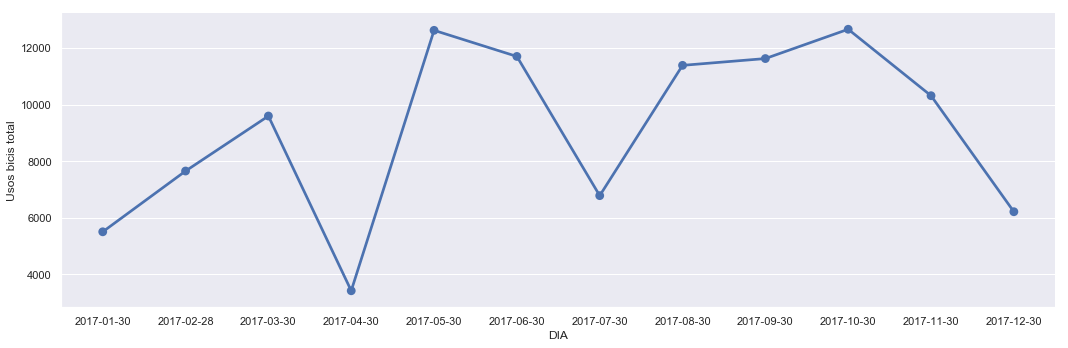

In [15]:
sns.catplot(x = "DIA", y = "Usos bicis total", data = Usos2017,  height=5, aspect=3, linestyles=["-"], kind="point")

Efectivamente este muestra el cambio brusco de los usos de bicis total cada mes del año.

Observamos que hay una subida constante y casi exponencial los tres primeros meses del año, pero después en abril experimenta una caida brusca, de la cual se recupera y alcanza el máximo del año el mes subsecuente. El resto del año se puede observar un comportamiento muy parecido; se realza la inestable trayectoria de los datos durante el año.

* **Gráfico 2.2**

El próximo gráfico toma la forma de un diagrama de barras. Este tipo de represetación se utiliza para comparar dos o más valores, por eso lo hemos escogido para comparar el comportamiento de los dos tipos de abonos, permitiéndonos profundizar en el análisis. Los dos tipos de abono disponible son el abono anual y el abono ocasional. 

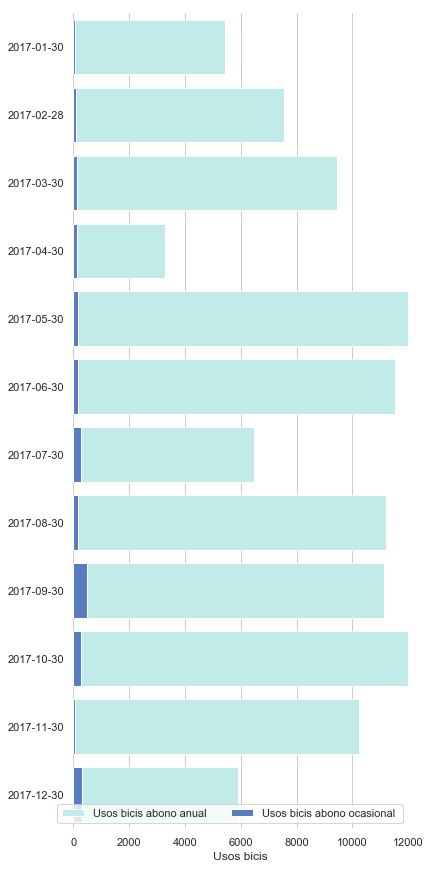

In [16]:
sns.set(style="whitegrid")

# Inicializamos gafico matplotlib
f, ax = plt.subplots(figsize=(6, 15))

# Graficar Usos bicis abono anual
sns.set_color_codes("pastel")
sns.barplot(x="Usos bicis abono anual ", y="DIA", data=Usos2017,
            label="Usos bicis abono anual ", color="c")

# Graficar Usos bicis abono anual
sns.set_color_codes("muted")
sns.barplot(x="Usos bicis abono ocasional ", y="DIA", data=Usos2017,
            label="Usos bicis abono ocasional ", color="b")

# Leyenda
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 12000), ylabel="",
       xlabel="Usos bicis")
sns.despine(left=True, bottom=True)

A través de este gráfico podemos comprobar que el abono mas utilizado es el abono anual, con una diferencia muy elevada. El abono anual nos confirma lo deducido anteriormente, mostrando un patron muy similar al del gráfico anterior. A su vez, este gráfico revela que no parece haber ninguna relación entre ambos abonos, ya que se comportan de manera diferente cada uno a lo largo de los meses. El mes en el que más se emplea el abono ocasional no es el que mas incidencia tiene de abonos anuales, y viceversa. El mes que más frecuenta el abono ocasional es septiembre. Una posible explicación para esto se basa en el turismo. Este es un fenómeno en el que también hacemos énfasis ya que Madrid es una ciudad con un alto nivel turístico, y bien conocida por su prominencia en este sector. Nos apoyamos en estadísticas externas, ya que según fuentes de datos de la Comunidad de Madrid septiembre es uno de los meses mas frecuentados incluso por encima de lo meses de verano.

Este gráfico lo hemos escogido debido a su alto nivel de poder visual, pudiendo comprobar rápidmente la conclusion anterior. A su vez nos ayuda a reforzar las conclusiones ya alcanzadas anteriormente sobre la conducta del uso de las bicis dependiendo del mes del año en el que nos encontremos.

* **Gráfico 2.3**

A continuación se muestra un heatmap (mapa de calor), estos son aquellos que utilizan como forma de representación una termografía, adjudicando tonos distintos de una jerarquía de polos. Este último gráfico es más específico, con el fin de presentar la información de la manera más gráfica y útil posible. Asi pues resultando en una experiencia mucho más visual que promueve la toma de conclusiones.

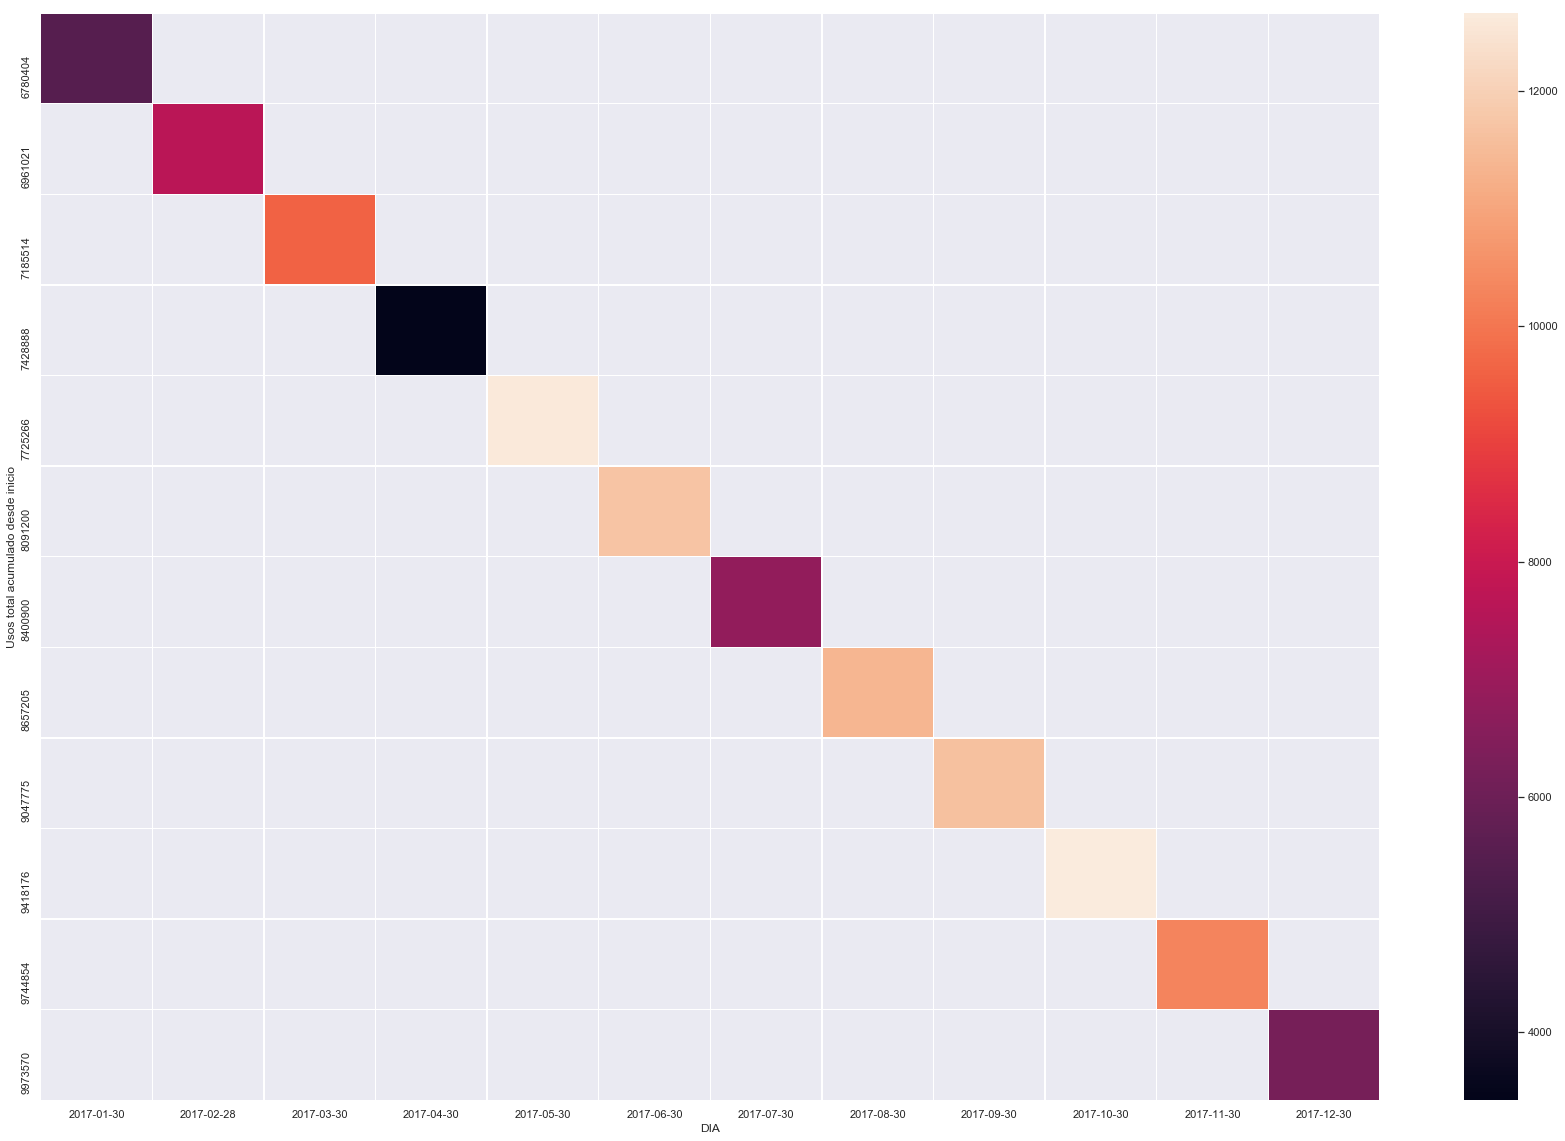

In [17]:
sns.set()

# Mapa de calor del 30 de cada mes de 2017
usos = Usos2017.pivot("Usos total acumulado desde inicio", "DIA", "Usos bicis total")

# Dibuja el mapa de calor con sus respectivos valores para cada mes (con un color diferete segun la intensidad de usos)
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(usos, linewidths=.5, ax=ax)

Aqui podemos volver a comprobar que el mes de menos uso es abril, que aparece en el color más oscuro de todos, y el mes en el que más uso se les da a las bicis es octubre, que se apropia del tono más claro. Podemos afirmar que efectivamente este es un método muy visual de llegar a estas conclusiones.

**Conclusiones finales**

Después de haber analizado estas tres representaciones opinamos que es importante hacer énfasis en la influencia del tiempo en el uso de las bicicletas. Las condiciones meteorológicas podrían ser el elemento más importante a la hora de decidir si utilizar una bicicleta o no.
Por ejemplo, los meses mas fríos (aproximadamente diciembre, enero, febrero y marzo) se ve que se utiliza menos, bien podria ser porque las temperaturas bajas se convierten en el elemento que desincentiva el uso de la bicicleta. Sin embargo, es abril el mes que se apropia la cifra más baja de uso de la bicicleta, esto nos lleva a apoyarnos en la certeza detrás del refrán 'abril aguasmil'.

Nos sorprende que agosto tenga un numero tan elevado, ya que debido a las altas temperaturas montar en bici podría convertirse en una actividad tediosa. Puede deberse a que se desaloja Madrid al irse un elevado número de la población de vacaciones, por tanto es más seguro utilizar la bici. 

**3. Bases BiciMAD**

El dataset de las bases de biciMAD nos interesaba ya que podiamos aplicar tecnicas de 'mapping'. Considerabamos esta última una forma muy eficaz de visualizar la densidad de bicicletas en las distintas zonas de Madrid.

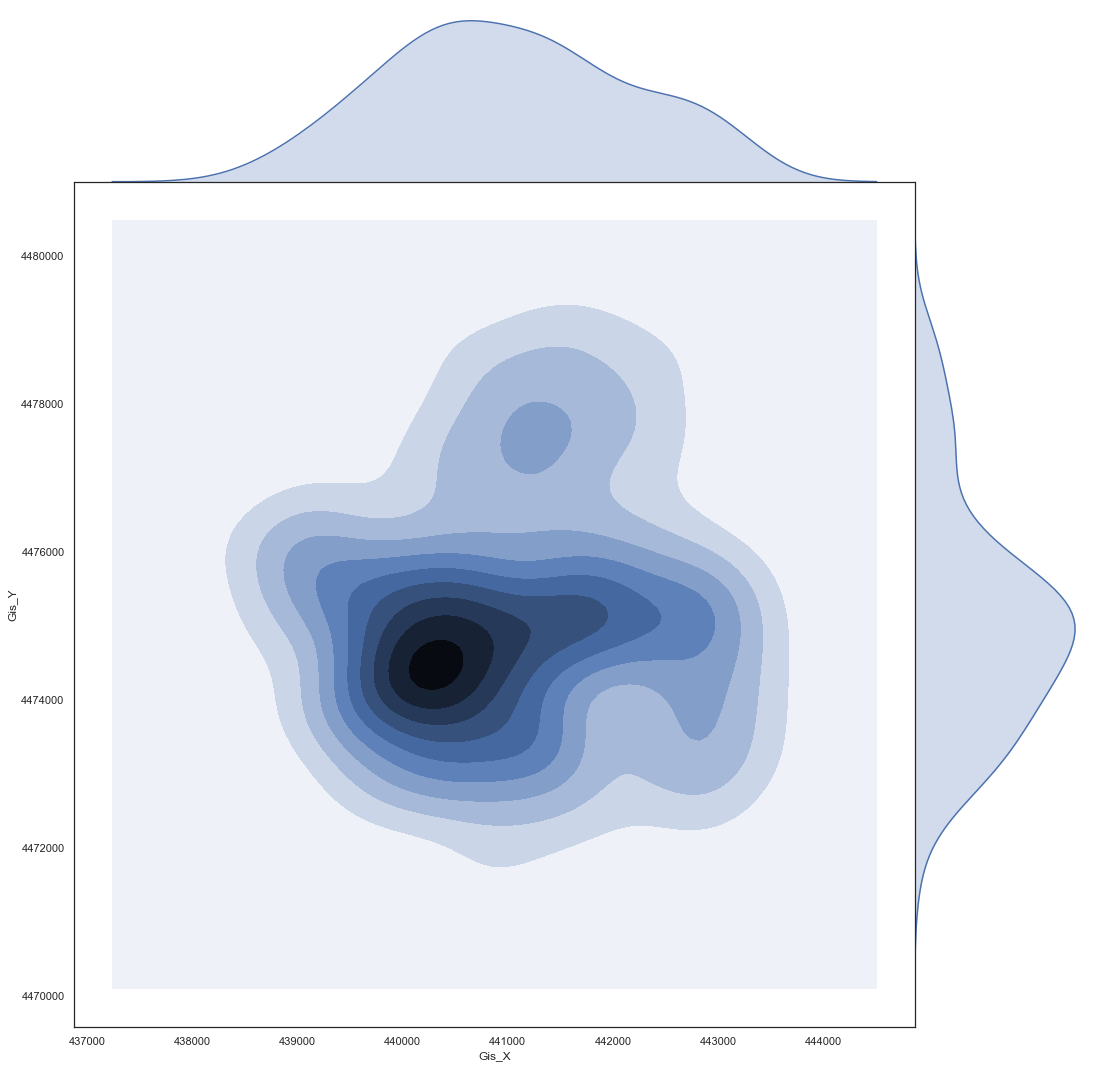

In [18]:
sns.set(style="white")

# A la hora de mappear insertamos las coordenadas que nos ofrece el dataset.
g = sns.jointplot(x = "Gis_X", y = "Gis_Y", kind="kde", data = dfBases, height=15, space=0)

Efectivamente el mapa nos confirma lo que esperabamos: el foco de las bases reside en el centro de la ciudad y el número de bases va disminuyendo cuanto más te alejas de la zona centro. Este formato de mapeo nos ha gustado mucho porque de manera muy visual nos muestra la densidad de bases bicicletas, incluyendo un histograma en los laterales que refleja la distribución de las bases y que sirve como refuerzo a la hora de la toma de conclusiones. Con este histograma podemos apreciar las distribuciones de norte a sur y de este a oeste de las bases de bicicletas. Con esto podemos ver que en la zona sur de Madrid se utilza más la bicicleta que en el norte. Asumimos que donde más bases de bicicletas hay, más demanda hay de bicicletas y por consiguiente experimente mayor utilización.

#### Web Scrapping

Nos atraia la idea de aplicar la tecnica de 'web scrapping' en nuestro proyecto, y decidimos que sería interesante emplearla para obtener los datos de aquellas estaciones de biciMad que se encontrasen fuera d servicio. En la página web oficial de este servicio encontramos una sección con las instancias sobre las estaciones que no se encontrasen en funcionamiento. 

En ellas se especifican las siguientes:
* Nombre
* Estado
* Fecha Inicio
* Fecha Finalización

Para realizar el web scrapping debiamos importar la libreria pyspark desde la terminal de anaconda.
Introducimos lo siguiente:
pip install pyspark.

Luego procedimos asi:

In [19]:
# Importamos las librerias necesarias
import sys, getopt, os, pyspark, datetime
import pandas as pd

import requests
from bs4 import BeautifulSoup

requests.get (se conecta a página web) y almacena su estado y todo el código HTML:

In [20]:
r = requests.get("https://u.bicimad.com/estadoservicio")

Comprobamos que la página web existe y se puede acceder:

In [21]:
# Para ello comprobamos el código de estado
r.status_code

200

Para proceder con el web scrapping debemos sumergirnos en el código HTML e inspeccinarlo para buscar donde se encuentra aquello que queremos scrappear:

In [22]:
# Mostramos solo 500 ya que el código HTML entero es muy grande
r.text[:500]

'\n\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html lang="es">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1" />\n<title>BiciMAD</title>\n\n<link media="all" type="text/css" rel="stylesheet" href="https://u.bicimad.com/css/style.css">\n\n<link media="all" type="text/css" rel="stylesheet" href="https://u.bicimad.c'

BeatifulSoup formatea el anterior código HTML en trozos para poder buscar:

In [23]:
soup = BeautifulSoup(r.text, 'html.parser')

Tras haber encontrado lo que buscabamos y nos interesaba mostrar empleamos BeautifulSoup para que nos enseñe el/los trozos del HTML donde se encuentra:

In [24]:
# Vemos si hay titulos en la tabla.
soup.findAll('tr')[0]

<tr id="fila1">
<th>Estación</th>
<th>Estado</th>
<th>Fecha inicio</th>
<th>Fecha finalización</th>
</tr>

In [25]:
# Probamos a mostrar una estación
soup.find('tr', {'class': 'seleccion_fila'})

<tr class="seleccion_fila">
<td>54 - Barceló</td>
<td>Estación no operativa por tareas de mantenimiento.</td>
<td>22/01/2019</td>
<td>Sin previsión</td>
</tr>

In [26]:
# Mostramos todas las estaciones inactivas & sus datos correspondientes.
all = soup.find_all('tr', {'class': 'seleccion_fila'})
all

[<tr class="seleccion_fila">
 <td>54 - Barceló</td>
 <td>Estación no operativa por tareas de mantenimiento.</td>
 <td>22/01/2019</td>
 <td>Sin previsión</td>
 </tr>, <tr class="seleccion_fila">
 <td>33 - Carretas</td>
 <td>Estación no operativa debido a obras en la zona.</td>
 <td>13/07/2018</td>
 <td>Sin previsión</td>
 </tr>, <tr class="seleccion_fila">
 <td>21b - Red de San Luis B</td>
 <td>Estación no operativa debido a obras en la zona.</td>
 <td>26/04/2018</td>
 <td>Sin previsión</td>
 </tr>, <tr class="seleccion_fila">
 <td>21a - Red de San Luis A</td>
 <td>Estación no operativa debido a obras en la zona.</td>
 <td>26/04/2018</td>
 <td>Sin previsión</td>
 </tr>]

In [27]:
# Mostramos las estaciones en un formato listado
for i in list(range(1, len(soup.findAll('tr')))):
    print(i)
    print(soup.findAll('tr')[i])

1
<tr class="seleccion_fila">
<td>54 - Barceló</td>
<td>Estación no operativa por tareas de mantenimiento.</td>
<td>22/01/2019</td>
<td>Sin previsión</td>
</tr>
2
<tr class="seleccion_fila">
<td>33 - Carretas</td>
<td>Estación no operativa debido a obras en la zona.</td>
<td>13/07/2018</td>
<td>Sin previsión</td>
</tr>
3
<tr class="seleccion_fila">
<td>21b - Red de San Luis B</td>
<td>Estación no operativa debido a obras en la zona.</td>
<td>26/04/2018</td>
<td>Sin previsión</td>
</tr>
4
<tr class="seleccion_fila">
<td>21a - Red de San Luis A</td>
<td>Estación no operativa debido a obras en la zona.</td>
<td>26/04/2018</td>
<td>Sin previsión</td>
</tr>


Consideramos de enorme utilidad el web scrapping ya que nos permite obtener datos que no podemos alcanzar a través de otros medios convencionales como los portales de datos abiertos. Además la gran ventaja que le asociamos es que los datos se pueden actualizar en tiempo real; es decir, que poseemos una instancia actualizada del estado de las bases de BiciMad.

### Datos: Accidentes de tráfico con implicación de bicicletas

A continuación se plasman los accidentes de tráfico en la Ciudad de Madrid registrados por la Policía Municipal, es importante destacar que solo aparecen en el dataset aquellos en los que está implicada al menos una bicicleta.

**2010-2017:** incluye día, hora, nº de víctimas, distrito, nombre de la vía y tipo de accidente.

**Desde 2018:** se indica  tipo de vehículo, lesividad, estado de la vía, factores atmosféricos, sexo, tramo de edad y categoría del implicado, está última descrita en el campo como “tipo persona”.  

Si en un accidente hay más de un vehículo implicado, existe un registro por cada vehículo afectado o peaton. 
Esta relación de accidentes de tráfico de la ciudad de Madrid se refieren a accidentes de tráfico con víctimas y/o daños al patrimonio.

**IMPORTANTE:** 

En el conjunto de datos nos encontramos un registro por cada persona relacionada a una bicicleta que ha estado implicada en un accidente (conductor o viajero de la bicicleta) 
El campo "Número de víctimas" nos muestra el total de víctimas del accidente  (heridos graves, heridos leves y muertos) de todas las personas involucradas en el accidente: conductores y viajeros de cualquier vehículo implicado (bicicleta, turismo,...), peatones, etc. 

La terminología empleada para los tipos de accidente:

* **Colisión doble:** Accidente de tráfico ocurrido entre dos vehículos en movimiento.
* **Colisión múltiple:** Accidente de tráfico ocurrido entre más de dos vehículos en movimiento.
* **Choque con objeto fijo:** Accidente ocurrido entre un vehículo en movimiento con conductor y un objeto inmóvil que ocupa la vía o zona apartada de la misma, ya sea vehículo estacionado, árbol, farola, etc.
* **Atropello:** Accidente ocurrido ente un vehículo y un peatón que ocupa la calzada o que transita por aceras, refugios, paseos o zonas de la vía pública no destinada a la circulación de vehículos.
* **Vuelco:** Accidente sufrido por un vehículo con más de dos ruedas y que por alguna circunstancia sus neumáticos pierden el contacto con la calzada quedando apoyado sobre un costado o sobre el techo.
* **Caída motocicleta:** Accidente sufrido por una motocicleta, que en determinado momento pierde el equilibrio, por causa del conductor o por las circunstancias de la vía.
* **Caída ciclomotor:** Accidente sufrido por un ciclomotor, que en determinado momento pierde el equilibrio, por causa del conductor o por las circunstancias de la vía.
* **Caída bicicleta:** Accidente sufrido por una bicicleta, que en determinado momento pierde el equilibrio, por causa del conductor o por las circunstancias de la vía.

#### Limpieza de Datos

Estos datasets han requerido una limpieza muy ligera, ya que se ofrecian en un formato muy adecuado. No no hemos encontrado valores nulos ni ninguna columna o fila que debiamos eliminar. Solamente hemos tenido que emplear procedimientos para renombrar ciertas columnas.

A continuación se muestran los dataframes con los que trabajamos:

* **dfAccidentes17:** nos muestra los datos de los accidentes ocurridos en el año 2017.

In [75]:
dfAccidentes17 = pd.read_excel('AccidentesBicicletas_2017.xlsx')
dfAccidentes17.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,Nº VICTIMAS *,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
0,2017-01-01,DE 6:00 A 6:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,BICICLETA,CONDUCTOR,MUJER,HG,DE 21 A 24 AÑOS
1,2017-01-02,DE 21:00 A 21:59,LUNES,SAN BLAS,CALLE DE MEQUINENZA NUM ...,14,2017/70,NO,NO,NO,...,NO,NO,SI,1,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS
2,2017-01-03,DE 19:00 A 19:59,MARTES,CENTRO,CALLE DE LA ESCALINATA NUM ...,8,2017/307,NO,NO,NO,...,NO,NO,SI,1,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 18 A 20 AÑOS
3,2017-01-04,DE 21:00 A 21:59,MIERCOLES,CENTRO,CALLE DE LA CAVA DE SAN MIGUEL NUM ...,13,2017/124,NO,NO,NO,...,NO,NO,NO,1,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 30 A 34 ANOS
4,2017-01-05,DE 8:00 A 8:59,JUEVES,MONCLOA-ARAVACA,PUENTE DE LOS FRANCESES ...,0,2017/206,NO,NO,NO,...,NO,NO,NO,1,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 45 A 49 AÑOS


* **dfAccidentes18:** nos muestra los datos de los accidentes ocurridos en el año 2018.

In [29]:
dfAccidentes18 = pd.read_excel('AccidentesBicicletas_2018.xlsx')
dfAccidentes18.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,* Nº VICTIMAS,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
0,2018-01-01,DE 13:00 A 13:59,LUNES,ARGANZUELA,CALLE DE ANCORA - PASEO DE LAS DELICIAS ...,0,2018/25,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 30 A 34 ANOS
1,2018-01-01,DE 15:00 A 15:59,LUNES,CENTRO,CALLE DE ALCALA NUM ...,44,2018/76,NO,NO,NO,...,NO,NO,SI,2,ATROPELLO,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS
2,2018-01-02,DE 12:00 A 12:59,MARTES,SALAMANCA,CALLE DE SERRANO - CALLE DEL CONDE DE ARANDA ...,0,2018/30,NO,NO,NO,...,NO,NO,SI,2,ATROPELLO,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 40 A 44 AÑOS
3,2018-01-03,DE 13:00 A 13:59,MIERCOLES,SALAMANCA,PLAZA DE LA INDEPENDENCIA NUM ...,5,2018/94,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS
4,2018-01-03,DE 15:00 A 15:59,MIERCOLES,CIUDAD LINEAL,CALLE DE RAMIREZ DE ARELLANO NUM ...,35,2018/361,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS


* **dfAccidentes1718:** consiste en un dataframe que muestra los datos de los accidentes que tuvieron lugar tanto en los años 2017 y 2018.

In [30]:
# Unimos los dos dataframes
dfAccidentes1718 = dfAccidentes17.append(dfAccidentes18, ignore_index=True, sort = False)
dfAccidentes1718.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Hielo,CPSV Seca Y Limpia,Nº VICTIMAS *,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad,* Nº VICTIMAS
0,2017-01-01,DE 6:00 A 6:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,SI,1.0,CHOQUE CON OBJETO FIJO,BICICLETA,CONDUCTOR,MUJER,HG,DE 21 A 24 AÑOS,NaN
1,2017-01-02,DE 21:00 A 21:59,LUNES,SAN BLAS,CALLE DE MEQUINENZA NUM ...,14,2017/70,NO,NO,NO,...,NO,SI,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS,NaN
2,2017-01-03,DE 19:00 A 19:59,MARTES,CENTRO,CALLE DE LA ESCALINATA NUM ...,8,2017/307,NO,NO,NO,...,NO,SI,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 18 A 20 AÑOS,NaN
3,2017-01-04,DE 21:00 A 21:59,MIERCOLES,CENTRO,CALLE DE LA CAVA DE SAN MIGUEL NUM ...,13,2017/124,NO,NO,NO,...,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 30 A 34 ANOS,NaN
4,2017-01-05,DE 8:00 A 8:59,JUEVES,MONCLOA-ARAVACA,PUENTE DE LOS FRANCESES ...,0,2017/206,NO,NO,NO,...,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 45 A 49 AÑOS,NaN


In [31]:
# Cambiamos los nombres de las columnas Nº Victimas ya que vienen con el mismo nombre, de manera que se puedan diferenciar (ya que cada una corresponde a un año diferente)
dfAccidentes1718 = dfAccidentes1718.rename(columns={'*  Nº VICTIMAS': 'Nº VICTIMAS 2018'})
dfAccidentes1718.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Hielo,CPSV Seca Y Limpia,Nº VICTIMAS *,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad,Nº VICTIMAS 2018
0,2017-01-01,DE 6:00 A 6:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,SI,1.0,CHOQUE CON OBJETO FIJO,BICICLETA,CONDUCTOR,MUJER,HG,DE 21 A 24 AÑOS,NaN
1,2017-01-02,DE 21:00 A 21:59,LUNES,SAN BLAS,CALLE DE MEQUINENZA NUM ...,14,2017/70,NO,NO,NO,...,NO,SI,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS,NaN
2,2017-01-03,DE 19:00 A 19:59,MARTES,CENTRO,CALLE DE LA ESCALINATA NUM ...,8,2017/307,NO,NO,NO,...,NO,SI,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 18 A 20 AÑOS,NaN
3,2017-01-04,DE 21:00 A 21:59,MIERCOLES,CENTRO,CALLE DE LA CAVA DE SAN MIGUEL NUM ...,13,2017/124,NO,NO,NO,...,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 30 A 34 ANOS,NaN
4,2017-01-05,DE 8:00 A 8:59,JUEVES,MONCLOA-ARAVACA,PUENTE DE LOS FRANCESES ...,0,2017/206,NO,NO,NO,...,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 45 A 49 AÑOS,NaN


### Análisis de Datos Unilateral

**1. Número de victimas a lo largo del año 2017**

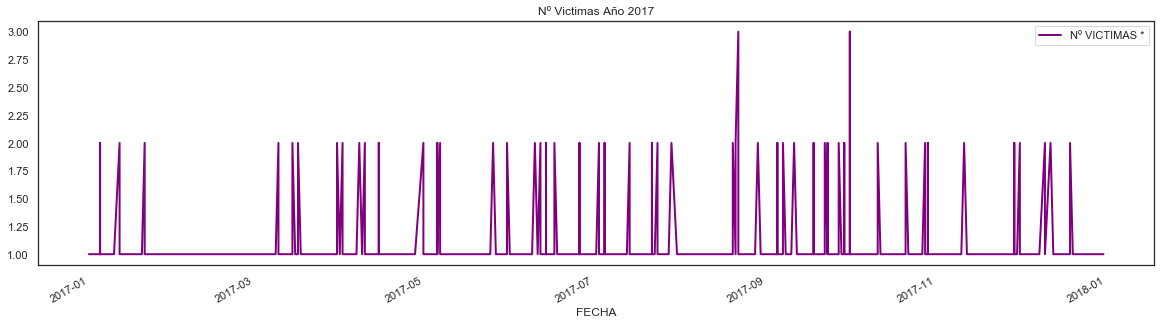

In [32]:
# Gráfico que muestra el numero de victimas a lo largo del año 2017
plot = dfAccidentes17.plot(y='Nº VICTIMAS *', x= 'FECHA' ,figsize=(20, 5), linewidth = 2, color= 'purple', title=('Nº Victimas Año 2017'))

En el año 2017, se muestra un número de víctimas que se mantiene bastante regular, variando entre 1 y 3, siendo este último el máximo alcanzado, como se muestra a continuación detalladamente:

In [33]:
dfAccidentes17.max()

FECHA                                               2017-12-31 00:00:00
RANGO HORARIO                                            DE 9:00 A 9:59
DIA SEMANA                                                      VIERNES
DISTRITO                                 VILLAVERDE                    
LUGAR ACCIDENTE       RONDA DE TOLEDO NUM                           ...
Nº PARTE                                                        2018/19
CPFA Granizo                                                         NO
CPFA Hielo                                                           SI
CPFA Lluvia                                                          SI
CPFA Niebla                                                          SI
CPFA Seco                                                            SI
CPFA Nieve                                                           NO
CPSV Mojada                                                          SI
CPSV Aceite                                                     

**2. Número de victimas a lo largo del año 2018**

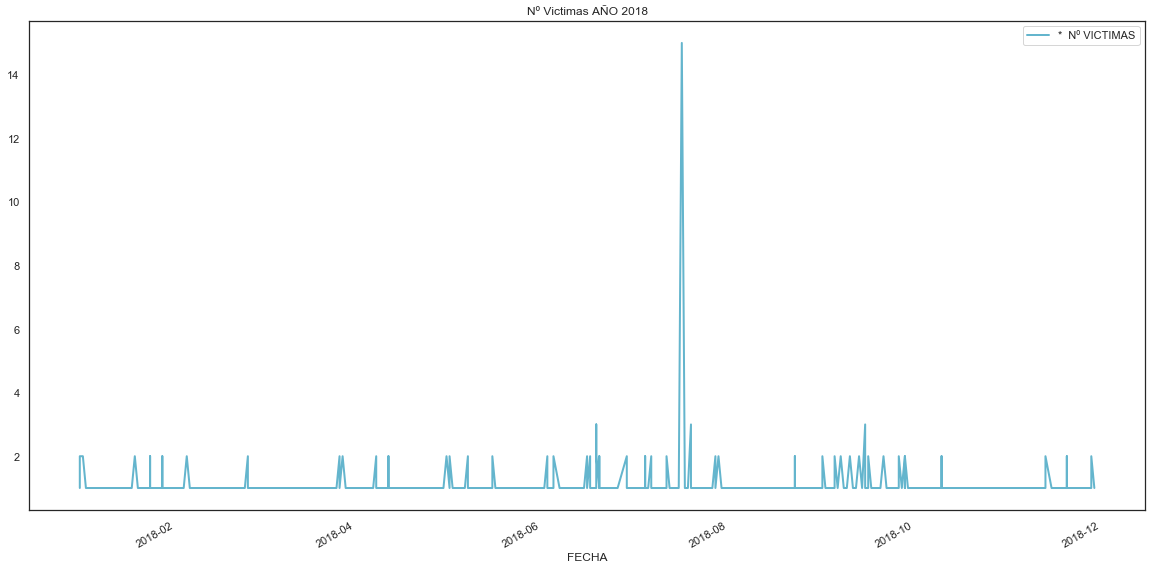

In [34]:
# Gráfico que muestra el numero de victimas a lo largo del año 2018
plot = dfAccidentes18.plot(y='*  Nº VICTIMAS', x= 'FECHA' ,figsize=(20, 10),linewidth = 2, color= 'c',title=('Nº Victimas AÑO 2018'))

Durante todo el año se mantiene constante entre una víctima, siendo este número la mayoría, y dos victimas. Cabe destacar un gran número de victimas en el mes de julio-agosto; llegando a las 14 víctimas. A continuación se muestra en detalle de este suceso:

In [35]:
dfAccidentes18.max()

FECHA                                               2018-11-29 00:00:00
RANGO HORARIO                                            DE 9:00 A 9:59
DIA SEMANA                                                      VIERNES
DISTRITO                                 VILLAVERDE                    
LUGAR ACCIDENTE       RONDA DEL CABALLERO DE LA MANCHA NUM          ...
Nº PARTE                                                      2018/9998
CPFA Granizo                                                         NO
CPFA Hielo                                                           SI
CPFA Lluvia                                                          SI
CPFA Niebla                                                          SI
CPFA Seco                                                            SI
CPFA Nieve                                                           NO
CPSV Mojada                                                          SI
CPSV Aceite                                                     

**3. Número de Víctimas por DISTRITO en Madrid**

Vamos a comparar el número de víctimas por accidentes de tráfico implicando bicicletas en distintos distritos de Madrid.

In [36]:
# Primero calculamos el número total de víctimas de ambos años en todos los distritos
dfAccidentes1718.sum()

Nº VICTIMAS *       831.0
Nº VICTIMAS 2018    755.0
dtype: float64

Podemos comprobar que la cantidad se ha reducido considerablemente de un año para otro. Podría marcar el camino hacia la supresión de accidentes en un futuro.

In [37]:
# Comprobamos el formato en el que se encuentran las variables para poder trabajar con ellas
dfAccidentes1718.DISTRITO.unique()

array(['ARGANZUELA                    ', 'SAN BLAS                      ',
       'CENTRO                        ', 'MONCLOA-ARAVACA               ',
       'LATINA                        ', 'TETUAN                        ',
       'FUENCARRAL-EL PARDO           ', 'BARAJAS                       ',
       'RETIRO                        ', 'VICALVARO                     ',
       'CIUDAD LINEAL                 ', 'HORTALEZA                     ',
       'CHAMARTIN                     ', 'CARABANCHEL                   ',
       'SALAMANCA                     ', 'CHAMBERI                      ',
       'PUENTE DE VALLECAS            ', 'VILLA DE VALLECAS             ',
       'VILLAVERDE                    ', 'USERA                         ',
       'MORATALAZ                     '], dtype=object)

In [38]:
# Número de victimas de accidentes del distrito CENTRO
dfAccidentes1718[dfAccidentes1718['DISTRITO'] == 'CENTRO                        '].sum()

Nº VICTIMAS *       150.0
Nº VICTIMAS 2018    139.0
dtype: float64

In [39]:
# Número de victimas de accidentes del distrito Hortaleza
dfAccidentes1718[dfAccidentes1718['DISTRITO'] == 'HORTALEZA                     '].sum()

Nº VICTIMAS *       34.0
Nº VICTIMAS 2018    24.0
dtype: float64

In [40]:
# Número de victimas de accidentes del distrito VILLAVERDE
dfAccidentes1718[dfAccidentes1718['DISTRITO'] == 'VILLAVERDE                    '].sum()

Nº VICTIMAS *       17.0
Nº VICTIMAS 2018    13.0
dtype: float64

Este análisis nos permite comprobar que en la periferia parecen tener lugar menos accidentes, además la diferencia es bastante significativa. La zona centro, es la que presenta los datos más altos. Esto se debe probablemente a que es la zona que recibe mayor tasa de tráfico, en comparación con zonas mas al exterior, donde el tráfico no se conoce que sea tan denso como en la almendra central. Podemos emplear ahora el mapa modelado previamente, donde se muestran la densidad de bases de BiciMad. Este mapa nos mostraba la distribución de las bases como un núcleo en la zona centro que se iba expandiendo y a medida que lo hacia la densidad de bases disminuia. Esto podría tener una estrecha relación con lo revelado en este análisis; parece ser que a medida que nos alejamos de la zona centro los accidentes de bicicletas disminuyen, y podría ser debido a que se emplean menos.

Sin embargo, debemos tener en cuenta que las bicicletas convencionales también toman un papel importante aquí. No sabemos si los accidentes implican una bicicleta como estas últimas o una bicicleta BiciMad y por lo tanto no podemos establcer una relación directa entre el uso de BiciMad en cada distrito con los accidente que implican bicicletas. Pero sin duda creemos que puede haber alguna relación de correlación entre uso de BiciMad y el número de accidentes. Especialmente ponemos el foco en el caso de la zona centro, donde el uso de BiciMad es predominante, y se conoce que el número de usuarios es especialmente alto aqui. Por lo tanto, los riesgos de accidente son más altos, teniendo en cuenta también que es una zona muy transitada de tráfico, algo que eleva el riesgo enormemente para todos los usuarios de cualquier tipo de bicicleta.

**4. Número de Víctimas por EDAD & GENERO en Madrid**

In [41]:
# Renombramos la columna Tramo Edad para simplificar la tarea
dfAccidentes1718 = dfAccidentes1718.rename(columns={'Tramo Edad': 'Edad'})

In [42]:
# Comprobamos el formato en el que se encuentran las variables para poder trabajar con ellas
dfAccidentes1718.Edad.unique()

array(['DE 21 A 24 AÑOS', 'DE 25 A 29 AÑOS', 'DE 18 A 20 AÑOS',
       'DE 30 A 34 ANOS', 'DE 45 A 49 AÑOS', 'DE 65 A 69 AÑOS',
       'DE 35 A 39 AÑOS', 'DE 55 A 59 AÑOS', 'DE 50 A 54 AÑOS',
       'DE 40 A 44 AÑOS', 'DE 10 A 14 AÑOS', 'DE 15 A 17 AÑOS',
       'DE 6 A 9 AÑOS ', 'DE 60 A 64 AÑOS', 'DE 0 A 5 AÑOS',
       'DE MAS DE 74 AÑOS ', 'DESCONOCIDA', 'DE 70 A 74 AÑOS'],
      dtype=object)

* **18 a 20 años**

In [43]:
x = dfAccidentes1718.SEXO == 'HOMBRE' 
y = dfAccidentes1718.Edad == 'DE 18 A 20 AÑOS'
dfAccidentes1718[x & y].sum()

Nº VICTIMAS *       46.0
Nº VICTIMAS 2018    41.0
dtype: float64

In [44]:
x = dfAccidentes1718.SEXO == 'MUJER' 
y = dfAccidentes1718.Edad == 'DE 18 A 20 AÑOS'
dfAccidentes1718[x & y].sum()

Nº VICTIMAS *       4.0
Nº VICTIMAS 2018    8.0
dtype: float64

* **25 a 29 años**

In [45]:
x = dfAccidentes1718.SEXO == 'HOMBRE' 
y = dfAccidentes1718.Edad == 'DE 25 A 29 AÑOS'
dfAccidentes1718[x & y].sum()

Nº VICTIMAS *       93.0
Nº VICTIMAS 2018    97.0
dtype: float64

In [46]:
x = dfAccidentes1718.SEXO == 'MUJER' 
y = dfAccidentes1718.Edad == 'DE 25 A 29 AÑOS'
dfAccidentes1718[x & y].sum()

Nº VICTIMAS *       27.0
Nº VICTIMAS 2018    30.0
dtype: float64

* **50 a 54 años**

In [47]:
x = dfAccidentes1718.SEXO == 'HOMBRE' 
y = dfAccidentes1718.Edad == 'DE 50 A 54 AÑOS'
dfAccidentes1718[x & y].sum()

Nº VICTIMAS *       51.0
Nº VICTIMAS 2018    38.0
dtype: float64

In [48]:
x = dfAccidentes1718.SEXO == 'MUJER' 
y = dfAccidentes1718.Edad == 'DE 50 A 54 AÑOS'
dfAccidentes1718[x & y].sum()

Nº VICTIMAS *        9.0
Nº VICTIMAS 2018    10.0
dtype: float64

* **65 a 69 años**

In [49]:
x = dfAccidentes1718.SEXO == 'HOMBRE' 
y = dfAccidentes1718.Edad == 'DE 65 A 69 AÑOS'
dfAccidentes1718[x & y].sum()

Nº VICTIMAS *       12.0
Nº VICTIMAS 2018    10.0
dtype: float64

In [50]:
x = dfAccidentes1718.SEXO == 'MUJER' 
y = dfAccidentes1718.Edad == 'DE 65 A 69 AÑOS'
dfAccidentes1718[x & y].sum()

Nº VICTIMAS *       0.0
Nº VICTIMAS 2018    2.0
dtype: float64

Podemos ver que para los tres tramos de edad los datos se comportan de manera muy parecida. Se puede concluir a partir de estos datos que los hombres sufren más accidentes con implicación de bicicletas que las mujeres. Las cifras además presentan una diferencia entre ambos generos bastante grande. La variedad entre distintas franjas de edad es a su vez también bastante considerable. Entre las edades comprendidas entre 18-20 y 25-29 las cifras son exactamente las mismas, y las más altas. A medida que incrementan las edades, los números de víctimas decrecen exponencialmente; y siempre el número de mujeres será menor que el de hombres. Es más, podemos ver que no hubo ninguna mujer victima de estos accidentes en los años 2017 y 2018 de edad entre 65 y 69. Es razonable que a esta edad se utilize menos la bicicleta, y por esto hay menos accidentes que impliquen a personas de estas edades.

**5. Número accidentes en 2017 agrupados por el distrito y diferenciado por sexo**

In [51]:
b17 = pd.DataFrame(dfAccidentes17, columns = ['FECHA', 'Nº VICTIMAS *', 'DISTRITO', 'SEXO'])
b17.head()

,FECHA,Nº VICTIMAS *,DISTRITO,SEXO
0,2017-01-01,1,ARGANZUELA,MUJER
1,2017-01-02,1,SAN BLAS,HOMBRE
2,2017-01-03,1,CENTRO,HOMBRE
3,2017-01-04,1,CENTRO,HOMBRE
4,2017-01-05,1,MONCLOA-ARAVACA,HOMBRE


In [52]:
# Cambiamos el tipo de 'FECHA' para poder trabajar con ella
b17['FECHA'] = b17['FECHA'].apply(lambda x: x.strftime('%Y-%m-%d'))

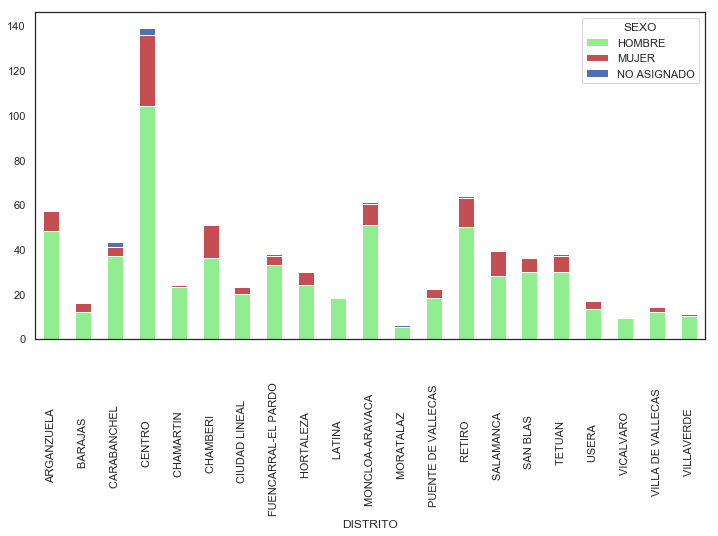

In [53]:
# Gráfico que muestra el numero accidentes en 2017 agrupados por el distrito y diferenciado por sexo
t = b17.groupby(['DISTRITO', 'SEXO'])['DISTRITO'].count().unstack('SEXO').fillna(0) 

t.plot(kind='bar', stacked=True, figsize=(12,6), color = ('lightgreen','r','b')) 

Como se puede observar, la mayoría de los accidentes se agrupan en el distrito centro, pero si lo comparamos se ve que este año hubo más accidentes que en 2018 (mostrado a continuación). Por otro lado, cabe destacar que los demás distritos continúan bastante estables, destacando como barrio con menor número de accidentes a Moratalaz.

**6. Número accidentes en 2018 agrupados por el distrito y diferenciado por sexo**

In [54]:
b18 = pd.DataFrame(dfAccidentes18, columns = ['FECHA', '*  Nº VICTIMAS', 'DISTRITO', 'SEXO'])
b18.head()

,FECHA,* Nº VICTIMAS,DISTRITO,SEXO
0,2018-01-01,1,ARGANZUELA,HOMBRE
1,2018-01-01,2,CENTRO,HOMBRE
2,2018-01-02,2,SALAMANCA,HOMBRE
3,2018-01-03,1,SALAMANCA,HOMBRE
4,2018-01-03,1,CIUDAD LINEAL,HOMBRE


In [55]:
# Cambiamos el tipo de 'FECHA' para poder trabajar con ella
b18['FECHA'] = b18['FECHA'].apply(lambda x: x.strftime('%Y-%m-%d'))

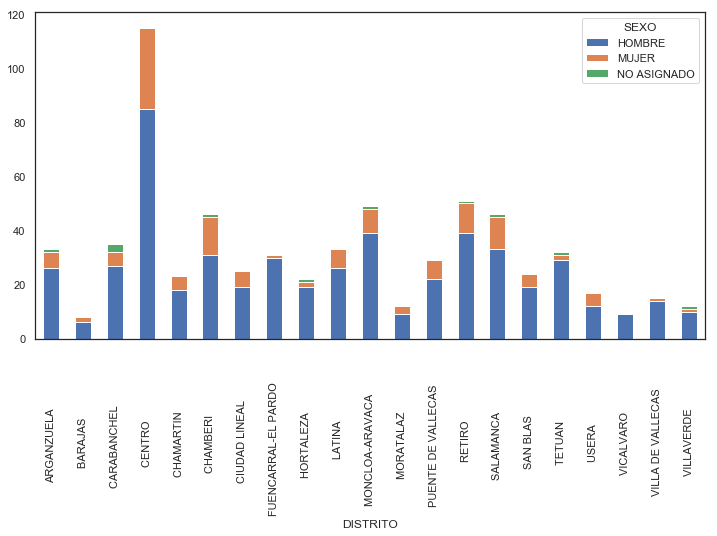

In [56]:
# Gráfico que muestra el número accidentes en 2018 agrupados por el distrito y diferenciado por sexo
t = b18.groupby(['DISTRITO', 'SEXO'])['DISTRITO'].count().unstack('SEXO').fillna(0) 

t.plot(kind='bar', stacked=True, figsize=(12,6)) 

En este caso, el distrito Centro sigue siendo el mayor con respecto a número de accidentes en ese año, lo cual puede estar relacionado con el uso de BiciMad ya que, como mostramos anteriormente, la mayoría de las bases de BiciMad se centran el el distrito Centro. Cabe destacar que la mayoría son hombres y los barrios con menor número de accidentes son: Barajas y Vicalvaro.

**7. Número de accidentes a lo largo de la semana cotejados con el sexo**

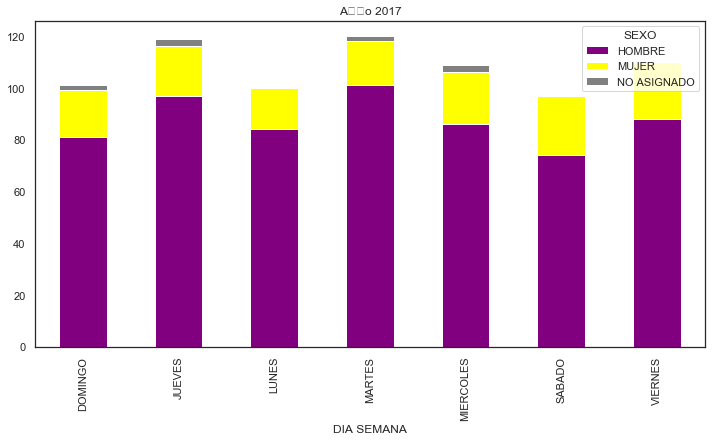

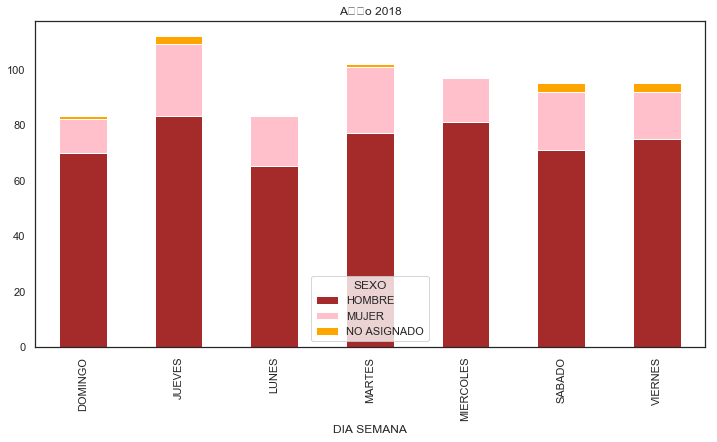

In [57]:
# Gráficos que comparan el numero de accidentes a lo largo de la semana con el sexo
# Gráfico2017
t = dfAccidentes17.groupby(['DIA SEMANA', 'SEXO'])['DIA SEMANA'].count().unstack('SEXO').fillna(0) 
t.plot(kind='bar', stacked=True, figsize=(12,6), color= ('purple','yellow', 'grey'),title=('A��o 2017')) 
# Gráfico2018
d = dfAccidentes18.groupby(['DIA SEMANA', 'SEXO'])['DIA SEMANA'].count().unstack('SEXO').fillna(0) 
d.plot(kind='bar', stacked=True, figsize=(12,6),color= ('brown','pink', 'orange'),title=('A��o 2018')) 

Como se puede observar, en ambos gráficos se mantiene constante la proporcion hombres/mujeres, con mayoría masculina. Además, no hay gran diferencia entre los accidentes
a lo largo de los diferentes días de la semana.

### Análisis de Datos Bilateral

Nuestro objetivo principal para el análisis conjunto de los datos de BiciMad y de accidentes con implicación de bicicletas era ver si hay alguna correlación entre el uso del servicio de la bicicleta eléctrica y la cantidad de accidentes que implican bicicletas en general.

Para ello creamos varios dataframes nuevos:

* **Usos Bicis 2017**

In [58]:
# Creamos un dataframe con los usos totales de bicis de 2017
UsosTotal17 = dfUsos.loc[923:1287 , ['DIA','Usos bicis total']]
UsosTotal17.head()

,DIA,Usos bicis total
923,2017-01-01,1900
924,2017-01-02,3413
925,2017-01-03,4663
926,2017-01-04,5376
927,2017-01-05,5193


In [59]:
# Cambiamos el nombre de la columna DIA para que se llame igual que la columna que marca la fecha en el dataframe AccidentesTotal1718
UsosTotal17 = UsosTotal17.rename(columns={'DIA': 'FECHA'})
UsosTotal17.head()

,FECHA,Usos bicis total
923,2017-01-01,1900
924,2017-01-02,3413
925,2017-01-03,4663
926,2017-01-04,5376
927,2017-01-05,5193


In [60]:
# Cambiamos el tipo de 'FECHA' para poder trabajar con ella
from datetime import datetime, date
UsosTotal17['FECHA'] = UsosTotal17['FECHA'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [61]:
UsosTotal17.sum()

FECHA               2017-01-012017-01-022017-01-032017-01-042017-0...
Usos bicis total                                              3350099
dtype: object

* **Usos Bicis 2018**

In [62]:
# Creamos un dataframe con los usos totales de bicis de 2018
UsosTotal18 = dfUsos.loc[1288:1622 , ['DIA', 'Usos bicis total']]
UsosTotal18.head()

,DIA,Usos bicis total
1288,2018-01-01,3769
1289,2018-01-02,6649
1290,2018-01-03,7889
1291,2018-01-04,8464
1292,2018-01-05,5947


In [63]:
# Cambiamos el nombre de la columna DIA para que se llame igual que la columna que marca la fecha en el dataframe AccidentesTotal1718
UsosTotal18 = UsosTotal18.rename(columns={'DIA': 'FECHA'})
UsosTotal18.head()

,FECHA,Usos bicis total
1288,2018-01-01,3769
1289,2018-01-02,6649
1290,2018-01-03,7889
1291,2018-01-04,8464
1292,2018-01-05,5947


In [64]:
# Cambiamos el tipo de 'FECHA' para poder trabajar con ella
from datetime import datetime, date
UsosTotal18['FECHA'] = UsosTotal18['FECHA'].apply(lambda x: x.strftime('%Y-%m-%d'))

* **Nº Víctimas Accidentes Bicicletas 2017**

In [65]:
# Creamos un dataframe que solo tenga las columnas FECHA y Nª VICTIMAS del año 2017
a = pd.DataFrame(dfAccidentes17, columns = ['FECHA', 'Nº VICTIMAS *'])
a.head()

,FECHA,Nº VICTIMAS *
0,2017-01-01,1
1,2017-01-02,1
2,2017-01-03,1
3,2017-01-04,1
4,2017-01-05,1


In [66]:
# Cambiamos el tipo de 'FECHA' para poder trabajar con ella
from datetime import datetime, date
a['FECHA'] = a['FECHA'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [67]:
a.sum()

FECHA            2017-01-012017-01-022017-01-032017-01-042017-0...
Nº VICTIMAS *                                                  831
dtype: object

* **Nº Víctimas Accidentes Bicicletas 2018**

In [68]:
# Creamos un dataframe que solo tenga las columnas FECHA y Nª VICTIMAS del año 2018
b = pd.DataFrame(dfAccidentes18, columns = ['FECHA', '*  Nº VICTIMAS'])
b.head()

,FECHA,* Nº VICTIMAS
0,2018-01-01,1
1,2018-01-01,2
2,2018-01-02,2
3,2018-01-03,1
4,2018-01-03,1


In [69]:
# Cambiamos el tipo de 'DIA' para poder trabajar con ella.
from datetime import datetime, date
b['FECHA'] = b['FECHA'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [70]:
b.sum()

FECHA             2018-01-012018-01-012018-01-022018-01-032018-0...
*  Nº VICTIMAS                                                  755
dtype: object

**Procedemos al análisis:**

**1. Uso Total vs. Nº Víctimas Accidentes Bicicletas 2017**

In [71]:
# Unimos los dos dataframes
sa = pd.merge(a, UsosTotal17, on=['FECHA'])
sa.head()

,FECHA,Nº VICTIMAS *,Usos bicis total
0,2017-01-01,1,1900
1,2017-01-02,1,3413
2,2017-01-03,1,4663
3,2017-01-04,1,5376
4,2017-01-05,1,5193


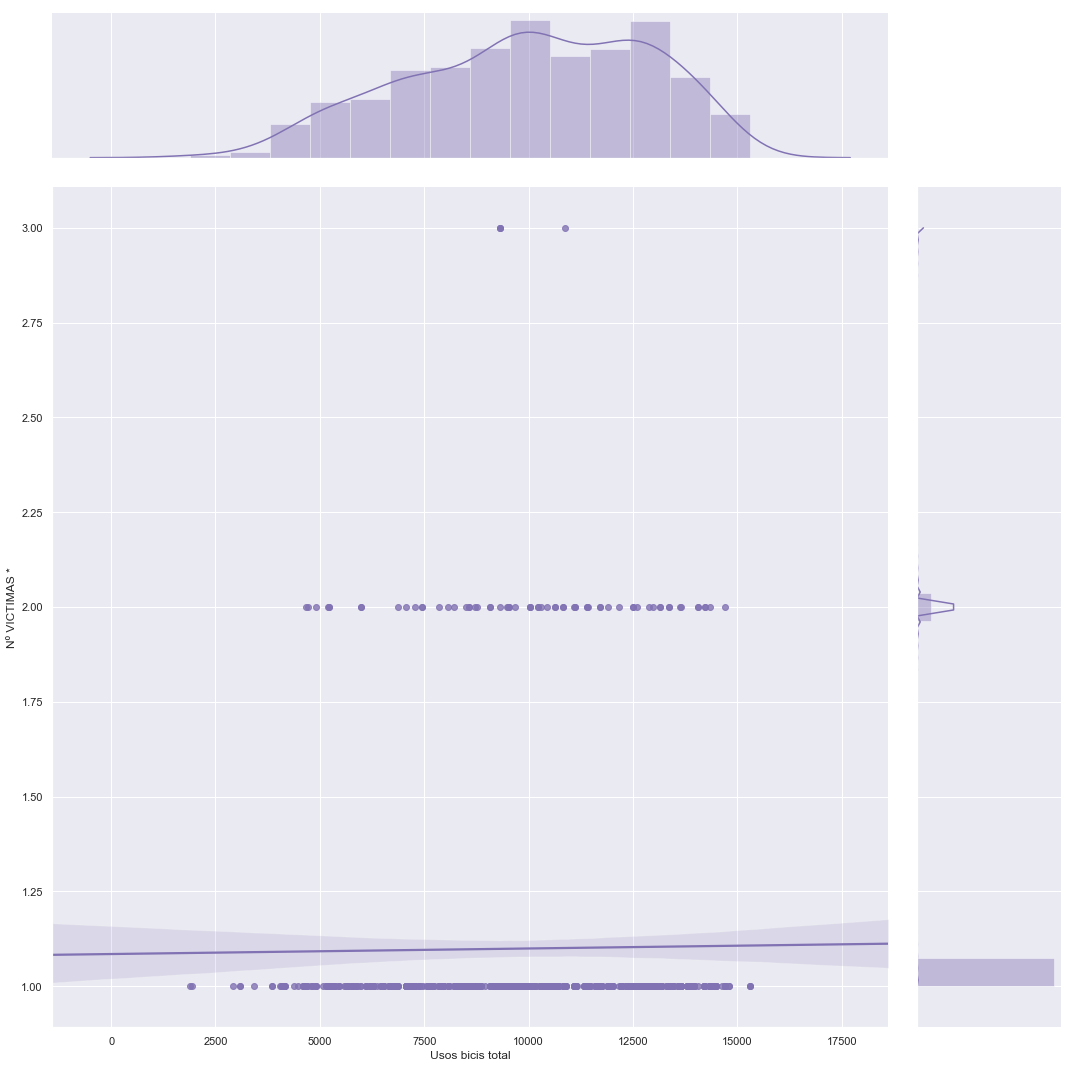

In [72]:
sns.set(style="darkgrid")

data = pd.DataFrame()
g = sns.jointplot("Usos bicis total", "Nº VICTIMAS *", data=sa, kind="reg",
                   color="m", height=15)

Este gráfico esta comparando el número de víctimas que habido en el año 2017 con el usos de bicis  total del tipo BiciMad ese mismo año. Observamos que el mayor numero de víctimas que se produce es tres, en dos ocasiones, pero no coincide con el momento en el que ha habido mayor uso de bicimad, por lo que intuimos que no ha sido por implicación de estas, sino de bicicletas ajenas a esta aplicación. Por otro lado vemos que una y dos víctimas se causan de manera constante entre los niveles medios del uso de bicis. La linea de regresión nos indica que no hay gran variación, como concluíamos anteriormente. 

**2. Uso Total vs. Nº Víctimas Accidentes Bicicletas 2018**

In [73]:
# Unimos los dos dataframes
sb = pd.merge(b, UsosTotal18, on=['FECHA'])
sb.head()

,FECHA,* Nº VICTIMAS,Usos bicis total
0,2018-01-01,1,3769
1,2018-01-01,2,3769
2,2018-01-02,2,6649
3,2018-01-03,1,7889
4,2018-01-03,1,7889


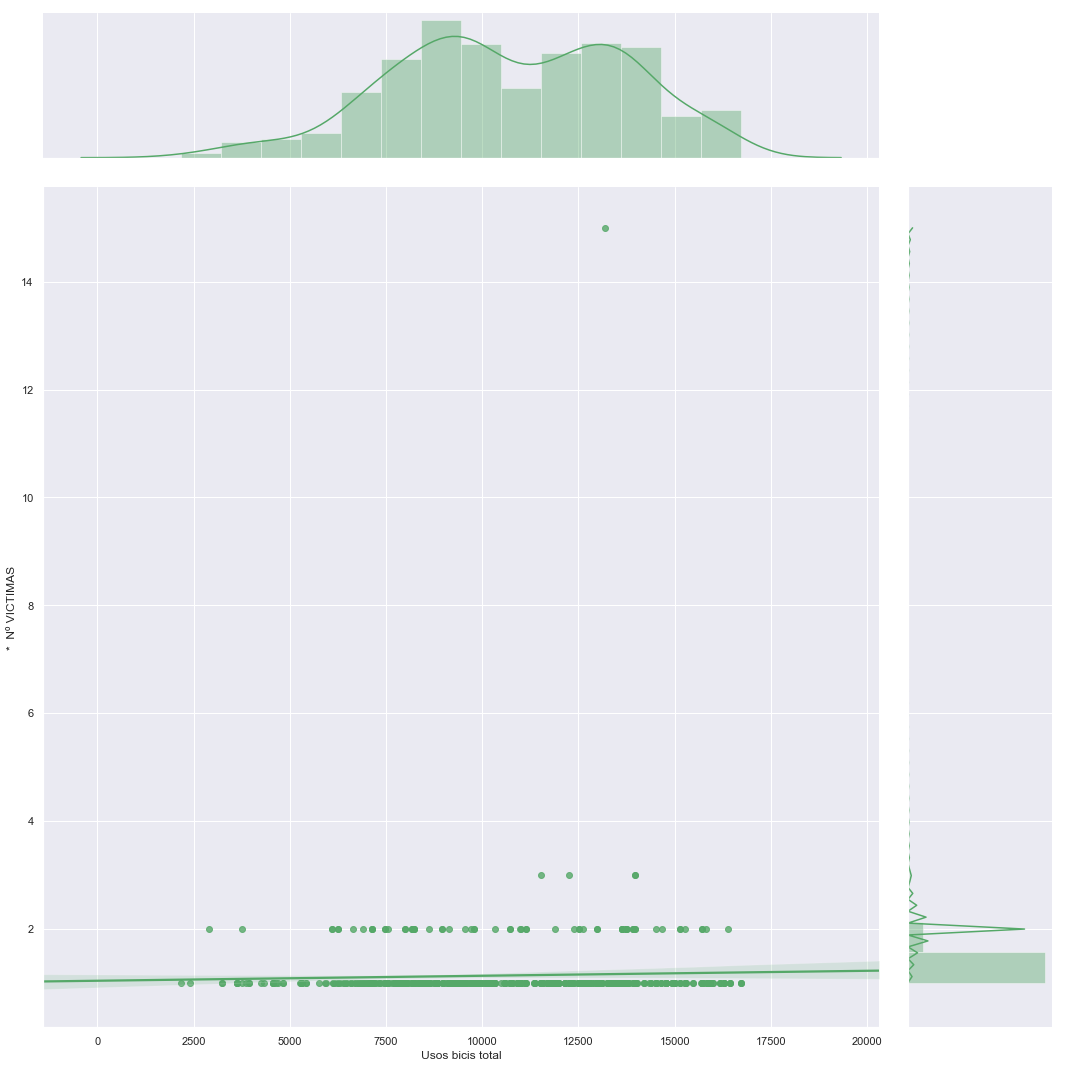

In [74]:
sns.set(style="darkgrid")

data = pd.DataFrame()
g = sns.jointplot("Usos bicis total", "*  Nº VICTIMAS", data=sb, kind="reg",
                   color="g", height=15)

El gráfico mostrado anteriormente, muestra el número de víctimas durante el año 2018 y el número de usos de bicis total del tipo BiciMad también ese año. Podemos ver que la mayoría de veces se produce una víctima y seguido, dos víctimas. Caben destacar tres casos de 3 víctimas y un outlier de 14 víctimas. Siempre se suelen producir en los valores medios del número total de usos de bicis, por lo que no podemos concluir si estos accidentes han sido por implicación de BiciMad o no.